### Consultas y Visualización

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import mysql.connector

In [2]:
estadios = mysql.connector.connect(host="localhost", user="root", passwd="julieta2809",database="estadios")

if estadios.is_connected():
    print("Conexión establecida correctamente.")
else:
    print("Problemas con la conexión.")

Conexión establecida correctamente.


In [3]:
cursor = estadios.cursor()

In [4]:
cursor.execute("SELECT confederation, SUM(capacity) FROM estadios_tres_confederaciones GROUP BY confederation ORDER BY SUM(capacity) DESC") 
               
capacidad_por_confedereacion = cursor.fetchall()

for i in capacidad_por_confedereacion:
    print (i)

('UEFA', Decimal('20158727'))
('CONCACAF', Decimal('9001050'))
('CONMEBOL', Decimal('4223002'))


In [5]:
capacidad_df = pd.DataFrame(capacidad_por_confedereacion, columns=[i[0] for i in cursor.description])

capacidad_df



,confederation,SUM(capacity)
0,UEFA,20158727
1,CONCACAF,9001050
2,CONMEBOL,4223002


In [34]:
capacidad_df['SUM(capacity)'] = capacidad_df['SUM(capacity)'].astype(int)
print(capacidad_df['SUM(capacity)'])

0    20158727
1     9001050
2     4223002
Name: SUM(capacity), dtype: int32


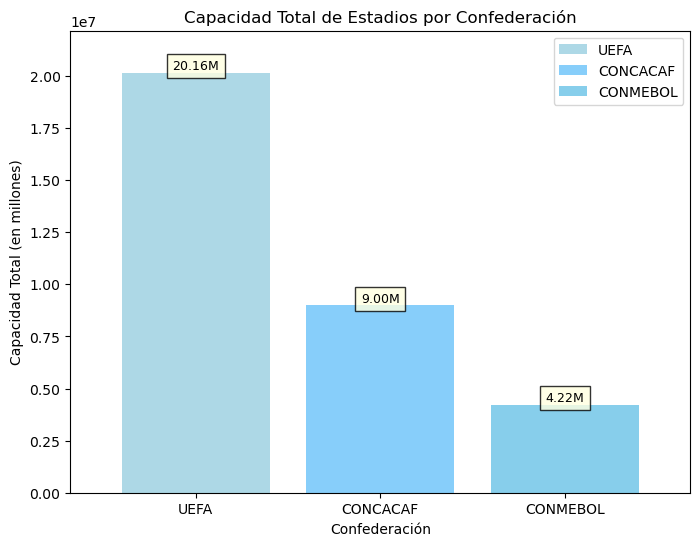

In [103]:
capacidad_df['SUM(capacity)'] = capacidad_df['SUM(capacity)'].astype(int)

plt.figure(figsize=(8, 6))
bars = plt.bar(capacidad_df['confederation'], capacidad_df['SUM(capacity)'], color=['lightblue', 'lightskyblue', 'skyblue'])
plt.xlabel('Confederación')
plt.ylabel('Capacidad Total (en millones)')
plt.title('Capacidad Total de Estadios por Confederación')
plt.margins(0.1)
plt.legend(bars, capacidad_df['confederation'])

for i, valor in enumerate(capacidad_df['SUM(capacity)']):
    plt.text(i, valor, f'{valor/1e6:.2f}M', ha='center', va='bottom', color='black', fontsize=9, 
             bbox = dict(facecolor = 'lightyellow', alpha =.8))

plt.show()

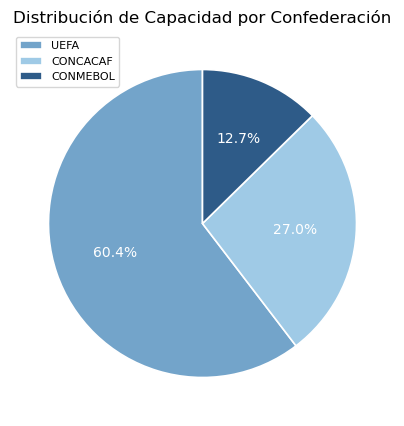

In [132]:
plt.figure(figsize=(5,5))
plt.pie(capacidad_df['SUM(capacity)'],
        startangle = 90, autopct = '%1.1f%%', colors=["#73A4CA", "#9FCAE6", "#2E5B88"], 
        wedgeprops = {"linewidth": 1.2, "edgecolor": "white"},textprops={'color': 'white'})

plt.legend(capacidad_df['confederation'],loc='upper left', fontsize=8)
plt.title('Distribución de Capacidad por Confederación');

In [ ]:
# Esto puede servirme para utilizarla en todo tipo de gráfico.

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center'
#           Bbox = dict(facecolor = 'red', alpha =.8))

In [153]:
cursor.execute("SELECT country AS País, SUM(capacity) AS Capacidad FROM estadios_tres_confederaciones WHERE confederation = 'conmebol' GROUP BY country ORDER BY SUM(capacity) DESC") 
               
capacidades_conmebol = cursor.fetchall()

for i in capacidad_por_confedereacion:
    print (i)

('Brazil', Decimal('1614462'))
('Argentina', Decimal('746576'))
('Chile', Decimal('401683'))
('Venezuela', Decimal('361597'))
('Colombia', Decimal('286529'))
('Peru', Decimal('216661'))
('Paraguay', Decimal('187000'))
('Ecuador', Decimal('180754'))
('Uruguay', Decimal('137740'))
('Bolivia', Decimal('90000'))


In [154]:
capacidades_conmebol_df = pd.DataFrame(capacidades_conmebol, columns=[i[0] for i in cursor.description])

In [155]:
capacidades_conmebol_df

,País,Capacidad
0,Brazil,1614462
1,Argentina,746576
2,Chile,401683
3,Venezuela,361597
4,Colombia,286529
5,Peru,216661
6,Paraguay,187000
7,Ecuador,180754
8,Uruguay,137740
9,Bolivia,90000


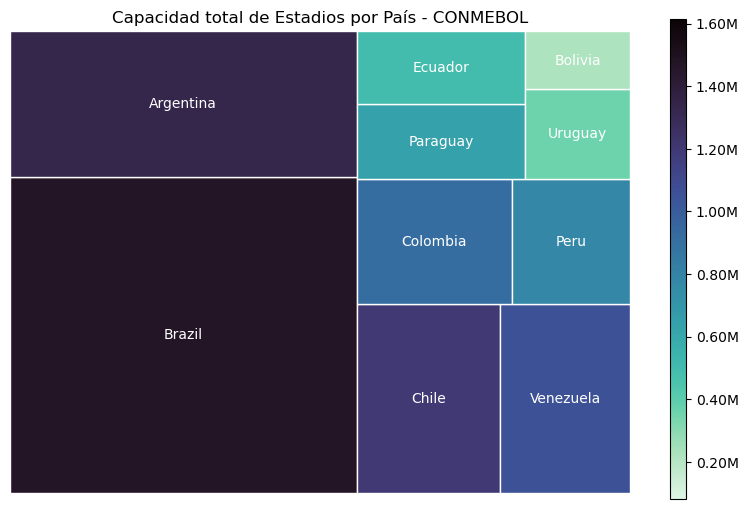

In [345]:
import squarify
import seaborn as sb
import matplotlib.colorbar as mcolorbar
from matplotlib.colors import Normalize, LinearSegmentedColormap

plt.subplots(figsize=(8, 6))

plt.title('Capacidad total de Estadios por País - CONMEBOL')

squarify.plot(sizes = capacidades_conmebol_df['Capacidad'], 
              text_kwargs = {'fontsize': 10, 'color': 'white'},
              label= capacidades_conmebol_df['País'],
              color = sb.color_palette("mako", len(capacidades_conmebol_df['País'])),
              linewidth=1,
              edgecolor='white'
             )

plt.axis("off")

# Crear el treemap con el mapa de colores invertido
cmap_mako = sb.color_palette("mako", as_cmap=True)
inverted_cmap = LinearSegmentedColormap.from_list("InvertedMako", cmap_mako.colors[::-1])

# Cambiar la normalización para invertir la barra de colores
norm = Normalize(vmin=capacidades_conmebol_df['Capacidad'].max(), vmax=capacidades_conmebol_df['Capacidad'].min())


# Crear la barra de colores con la normalización invertida
cbar = mcolorbar.ColorbarBase(plt.axes([0.95, 0.1, 0.02, 0.8]), cmap=inverted_cmap, norm=norm, orientation='vertical')

# Configurar el formato del eje y de la barra de colores para evitar la notación científica
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'));

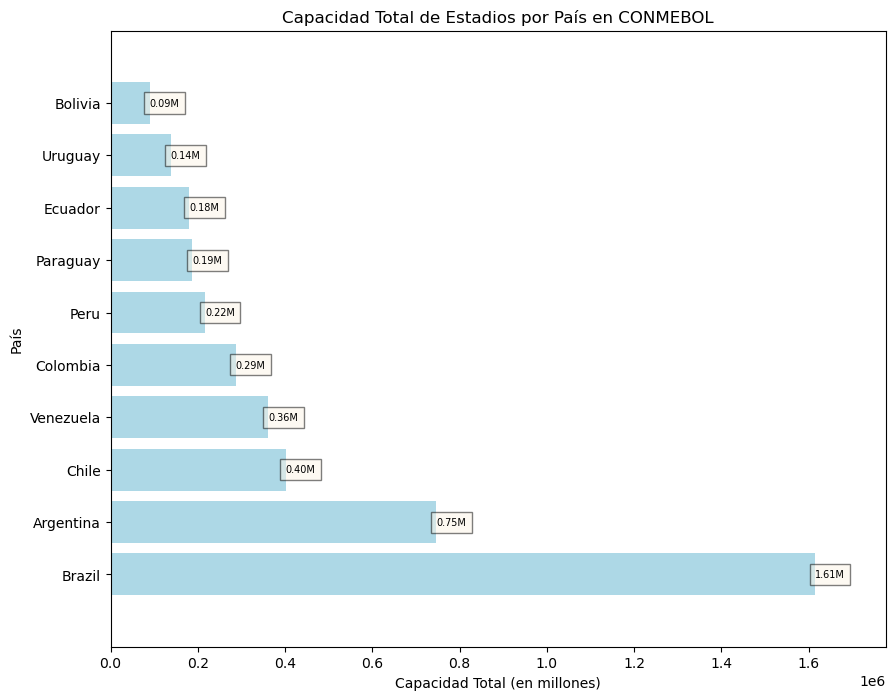

In [217]:
capacidades_conmebol_df['Capacidad'] = capacidades_conmebol_df['Capacidad'].astype(int)

plt.figure(figsize=(10, 8))
bars = plt.barh(capacidades_conmebol_df['País'], capacidades_conmebol_df['Capacidad'], color = 'lightblue')

plt.xlabel('Capacidad Total (en millones)')
plt.ylabel('País')
plt.title('Capacidad Total de Estadios por País en CONMEBOL')
plt.margins(0.1)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()/1e6:.2f}M',
             va='center', ha='left', color='black', fontsize=7, bbox = {'facecolor': 'oldlace', 'alpha': 0.5})

plt.show()

In [355]:
cursor.execute("SELECT country AS País, SUM(capacity) AS Capacidad, AVG(population) AS Poblacion FROM estadios_tres_confederaciones GROUP BY country ORDER BY AVG(population) DESC") 
               
capacidad_vs_poblacion = cursor.fetchall()

for i in capacidad_vs_poblacion:
    print (i)

('United States of America', Decimal('7150367'), Decimal('325719178.0000'))
('Brazil', Decimal('1614462'), Decimal('210147125.0000'))
('Russia', Decimal('1066224'), Decimal('144526636.0000'))
('Mexico', Decimal('1022560'), Decimal('133140936.0000'))
('Germany', Decimal('2453107'), Decimal('82800000.0000'))
('Turkey', Decimal('849098'), Decimal('80810525.0000'))
('France', Decimal('1427886'), Decimal('67348000.0000'))
('Italy', Decimal('1323616'), Decimal('60483973.0000'))
('England', Decimal('2383457'), Decimal('55619400.0000'))
('Colombia', Decimal('286529'), Decimal('49996445.0000'))
('Spain', Decimal('1686729'), Decimal('46710000.0000'))
('Argentina', Decimal('746576'), Decimal('43847430.0000'))
('Ukraine', Decimal('588981'), Decimal('42418235.0000'))
('Poland', Decimal('842187'), Decimal('38433600.0000'))
('Canada', Decimal('496496'), Decimal('37067011.0000'))
('Peru', Decimal('216661'), Decimal('32162184.0000'))
('Venezuela', Decimal('361597'), Decimal('31568179.0000'))
('Romania'

In [356]:
capacidad_vs_poblacion_df = pd.DataFrame(capacidad_vs_poblacion, columns=[i[0] for i in cursor.description])

capacidad_vs_poblacion_df

,País,Capacidad,Poblacion
0,United States of America,7150367,325719178.0000
1,Brazil,1614462,210147125.0000
2,Russia,1066224,144526636.0000
3,Mexico,1022560,133140936.0000
4,Germany,2453107,82800000.0000
...,...,...,...
63,Malta,21029,475700.0000
64,Iceland,40077,355620.0000
65,Greenland,2500,55877.0000
66,Faroe Islands,26240,51095.0000


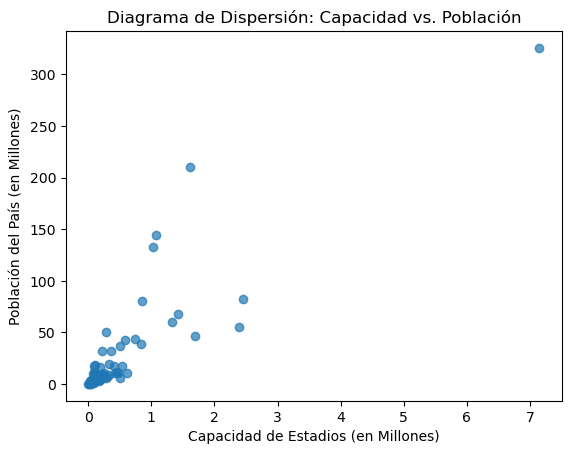

In [369]:
# plt.figure(figsize=(10, 6))
plt.scatter(capacidad_vs_poblacion_df['Capacidad']/1000000, 
            capacidad_vs_poblacion_df['Poblacion']/1000000, 
            alpha=0.7)

# Etiquetas y título
plt.xlabel('Capacidad de Estadios (en Millones)')
plt.ylabel('Población del País (en Millones)')
plt.title('Diagrama de Dispersión: Capacidad vs. Población')

# Configurar los ejes para evitar la notación científica
plt.ticklabel_format(style='plain', useOffset=False, axis='both')

plt.show()

In [387]:
capacidad_vs_poblacion_df['Poblacion Normalizada'] = pd.to_numeric(capacidad_vs_poblacion_df['Poblacion Normalizada'], errors='coerce')
capacidad_vs_poblacion_df['Poblacion'] = capacidad_vs_poblacion_df['Poblacion'].astype(float)
capacidad_vs_poblacion_df

,País,Capacidad,Poblacion,Poblacion Normalizada
0,United States of America,7150367,325719178.0,10000.000000
1,Brazil,1614462,210147125.0,6451.788510
2,Russia,1066224,144526636.0,4437.154634
3,Mexico,1022560,133140936.0,4087.598919
4,Germany,2453107,82800000.0,2542.067081
...,...,...,...,...
63,Malta,21029,475700.0,14.604605
64,Iceland,40077,355620.0,10.917994
65,Greenland,2500,55877.0,1.715496
66,Faroe Islands,26240,51095.0,1.568683


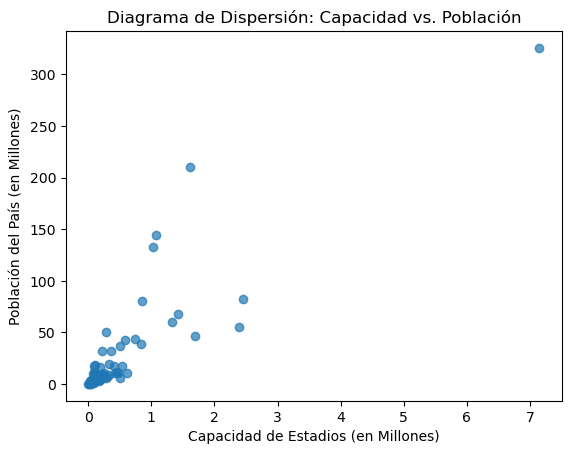

In [395]:
# plt.figure(figsize=(10, 6))
plt.scatter(capacidad_vs_poblacion_df['Capacidad']/1000000, 
            capacidad_vs_poblacion_df['Poblacion']/1000000, 
            alpha=0.7)

# Etiquetas y título
plt.xlabel('Capacidad de Estadios (en Millones)')
plt.ylabel('Población del País (en Millones)')
plt.title('Diagrama de Dispersión: Capacidad vs. Población')

# Configurar los ejes para evitar la notación científica
plt.ticklabel_format(style='plain', useOffset=False, axis='both')

plt.show()

In [347]:
!git add Consultas_Visualización.ipynb

In [348]:
!git commit -m "Creo TreeMap."

[main 1fdf096] Creo TreeMap.
 1 file changed, 94 insertions(+), 21 deletions(-)


In [349]:
!git push

To https://github.com/guilleldas/Proyecto_SQL_Python.git
   d5e709d..1fdf096  main -> main
